

```
DS
630710438 พรชิตา สุขใจ
630710439 พรดนัย โมชัย
```



#อธิบายที่มา และลักษณะของข้อมูลเบื้องต้น

The SMS Spam Collection เป็นชุดข้อมูลข้อความ SMS ที่มีป้ายกำกับ ซึ่งถูกเก็บรวบรวมไว้สำหรับการวิจัยเกี่ยวกับสแปมทางโทรศัพท์มือถือ จากเว็บไซต์ https://archive.ics.uci.edu/dataset/228/sms+spam+collection

In [1]:
#import data

import pandas as pd

df = pd.read_excel('/content/SMSSpamCollection.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Types   5574 non-null   object
 1   Text    5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.head()

,Types,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of SMS messages in this dataset ,namely {} \n".format(len(df.Types.unique()),
                                                                           ", ".join(df.Types.unique())))

There are 5574 observations and 2 features in this dataset. 

There are 2 types of SMS messages in this dataset ,namely ham, spam 



ข้อมูลประกอบด้วย 5574 แถว 2 คอลัมน์ ได้แก่ Types และ Text

Types คือ ชนิดของข้อมูล SMS มีทั้งหมด 2 ประเภท ham และ spam

Text คือ ข้อความ SMS ที่ส่งมา

#Wordclouds

1) แบบไม่แยกตาม class

In [ ]:
!pip install matplotlib wordcloud

In [ ]:
print(df.columns)


Index(['Types', 'Text'], dtype='object')


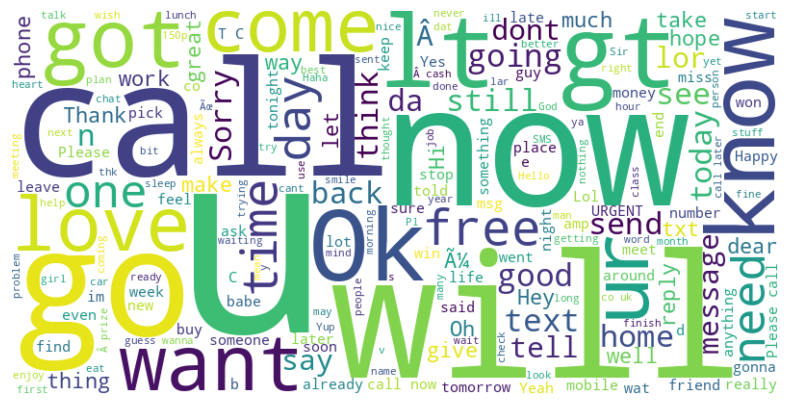

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all text into a single string
# ใช้ฟังก์ชัน map เพื่อแปลงทุกรายการในคอลัมน์ 'Text' เป็นสตริง
sms_data = ' '.join(map(str,df['Text']))

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sms_data)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


2) class spam

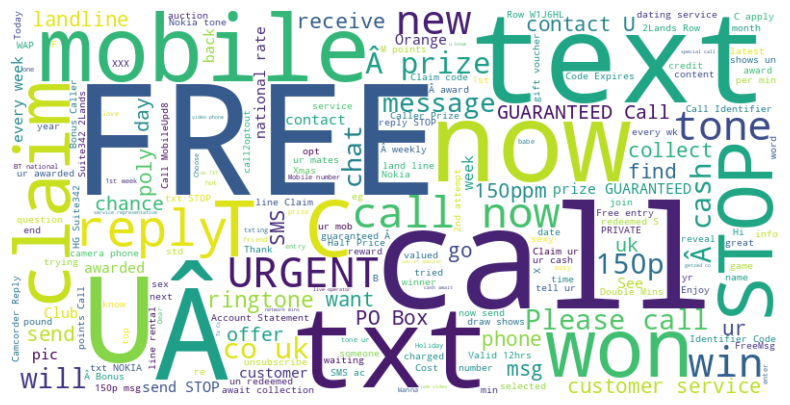

In [ ]:
# Filter DataFrame for 'spam' class
spam_data = df[df['Types'] == 'spam']

# Combine text into a single string
spam_sms_data = ' '.join(map(str, spam_data['Text']))

# Create WordCloud
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_sms_data)

# Display the WordCloud for 'spam' class
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


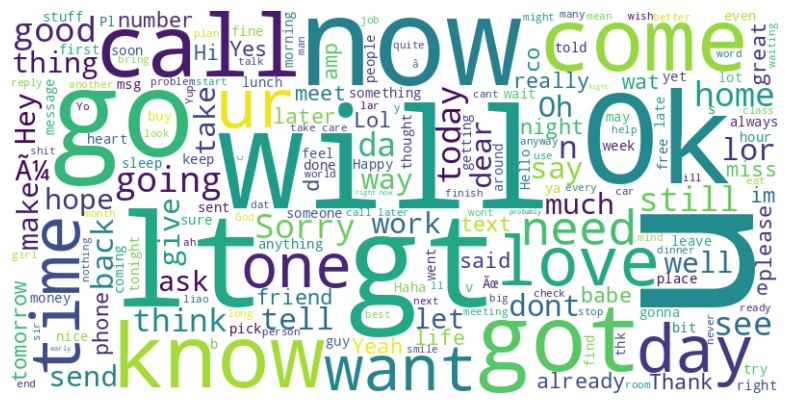

In [ ]:
# Filter DataFrame for 'ham' class
ham_data = df[df['Types'] == 'ham']

# Combine text into a single string
ham_sms_data = ' '.join(map(str, ham_data['Text']))

# Create WordCloud
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_sms_data)

# Display the WordCloud for 'ham' class
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Exploratory Data Analysis(EDA)
1. Proportion of data set
2. most freqency words in specific class
3. Text Range in each class
4. How many word in each text row
5. n-gram analysis on both spam and ham



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

1. Proportion of data set

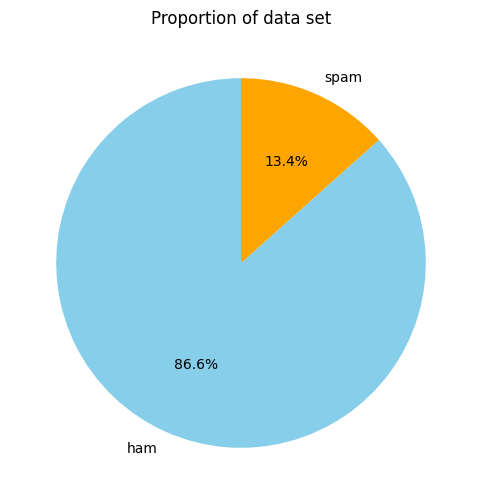

In [237]:
# Count the occurrences of each class
target_distribution = df['Types'].value_counts()

# Plot the distribution as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_distribution, labels=target_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=90)
plt.title('Proportion of data set')
plt.show()

-------

2. most freqency words in specific class

In [ ]:
df[df['Types']=="ham"].reset_index(drop=True)

,Types,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,ham,Even my brother is not like to speak with me. ...
...,...,...
4822,ham,Huh y lei...
4823,ham,Will Ã¼ b going to esplanade fr home?
4824,ham,"Pity, * was in mood for that. So...any other s..."
4825,ham,The guy did some bitching but I acted like i'd...


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def split_word(df):
  stop_words = set(stopwords.words('english'))

  word_list = []
  for text in df['Text']:
    if type(text) == str:
      word_list += (text.split())

  filtered_words = [word for word in word_list if word.lower() not in stop_words]
  dic = {}

  for raw_word in filtered_words:
      word = raw_word.lower()
      if word in dic:
          dic[word] += 1
      else:
          dic[word] = 1

  return dic

In [ ]:
dic = split_word(df[df['Types']=="ham"])
top_items_ham = sorted(dic.items(), key=lambda item: item[1], reverse=True)[:30]

df_ham_count = pd.DataFrame(top_items_ham, columns=['Word', 'Count'])
df_ham_count

,Word,Count
0,u,882
1,i'm,369
2,get,293
3,2,288
4,&lt;#&gt;,276
5,ur,241
6,go,238
7,got,228
8,.,228
9,like,223


In [ ]:
dic = split_word(df[df['Types']=="spam"])
top_items_spam = sorted(dic.items(), key=lambda item: item[1], reverse=True)[:30]

df_spam_count = pd.DataFrame(top_items_spam, columns=['Word', 'Count'])
df_spam_count

,Word,Count
0,call,342
1,free,180
2,2,169
3,ur,144
4,txt,136
5,u,117
6,text,112
7,mobile,109
8,claim,106
9,reply,101


[ call, Free, Claim, txt. mobile ] These words from spam class are often associated with spam messages

-------

3. Text Range in each class

In [ ]:
df['Length'] = df[df['Types']=="ham"]['Text'].str.len()
df_ham = df.dropna()
df_ham.sort_values('Length')

,Types,Text,Length
1925,ham,Ok,2.0
3051,ham,Ok,2.0
5359,ham,Ok,2.0
4498,ham,Ok,2.0
3376,ham,:),3.0
...,...,...,...
2158,ham,Sad story of a Man - Last week was my b'day. M...,588.0
1579,ham,How to Make a girl Happy? It's not at all diff...,611.0
2434,ham,Indians r poor but India is not a poor country...,629.0
1863,ham,The last thing i ever wanted to do was hurt yo...,790.0


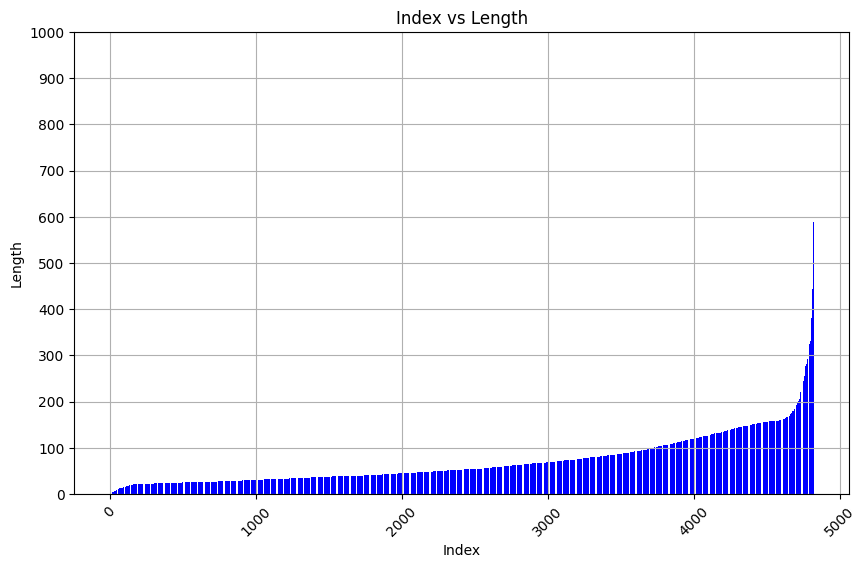

In [ ]:
barplot_ham = df_ham.sort_values('Length').reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.bar(barplot_ham.index, barplot_ham['Length'], color='blue')

plt.xlabel('Index')
plt.ylabel('Length')
plt.title('Index vs Length')
plt.xticks(rotation=45)
plt.yticks(range(0, int(max(barplot_ham['Length'])) + 100, 100))
plt.grid(True)
plt.show()

In [ ]:
df['Length'] = df[df['Types']=="spam"]['Text'].str.len()
df_spam = df.dropna()
df_spam.sort_values('Length')

,Types,Text,Length
3742,spam,2/2 146tf150p,13.0
3981,spam,ringtoneking 84484,18.0
2699,spam,FROM 88066 LOST Â£12 HELP,25.0
2079,spam,85233 FREE>Ringtone!Reply REAL,30.0
2804,spam,FreeMsg>FAV XMAS TONES!Reply REAL,33.0
...,...,...,...
4906,spam,Warner Village 83118 C Colin Farrell in SWAT t...,181.0
2247,spam,Hi ya babe x u 4goten bout me?' scammers getti...,181.0
2297,spam,<Forwarded from 21870000>Hi - this is your Mai...,183.0
3720,spam,"Thanks for your ringtone order, reference numb...",197.0


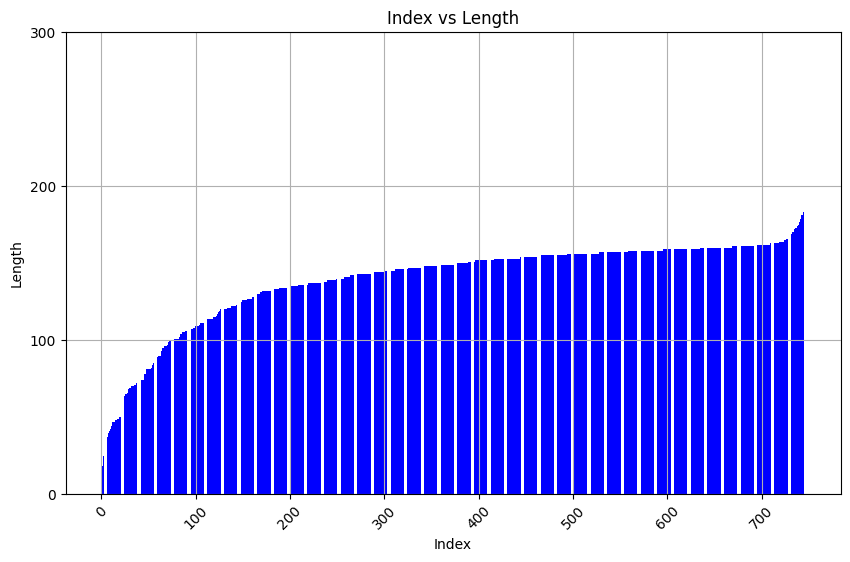

In [ ]:
barplot_spam = df_spam.sort_values('Length').reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.bar(barplot_spam.index, barplot_spam['Length'], color='blue')

plt.xlabel('Index')
plt.ylabel('Length')
plt.title('Index vs Length')
plt.xticks(rotation=45)
plt.yticks(range(0, int(max(barplot_spam['Length'])) + 100, 100))
plt.grid(True)
plt.show()

จำนวนตัวอักษรทั้งหมดของข้อมูล ham นั้นโดยส่วนมากมีจำนวนตัวอักษรที่น้อย และ spam โดยส่วนมากมีจำนวนตัวอักษรอยู่ที่ประมาณ 100-150

-------

4. How many word in each text row

In [ ]:
def count_words(text):
    if type(text) == str:
      return len(text.split())

df_ham['Word_Count'] = df_ham['Text'].apply(count_words)

<ipython-input-185-06cd18067929>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ham['Word_Count'] = df_ham['Text'].apply(count_words)


In [ ]:
df_ham.sort_values("Word_Count")

,Types,Text,Length,Word_Count
1273,ham,Ok...,5.0,1
284,ham,Okie...,7.0,1
4642,ham,Havent.,7.0,1
1483,ham,Ok...,5.0,1
1319,ham,Ok...,5.0,1
...,...,...,...,...
2434,ham,Indians r poor but India is not a poor country...,629.0,109
2158,ham,Sad story of a Man - Last week was my b'day. M...,588.0,125
2849,ham,Sad story of a Man - Last week was my b'day. M...,588.0,125
1863,ham,The last thing i ever wanted to do was hurt yo...,790.0,162


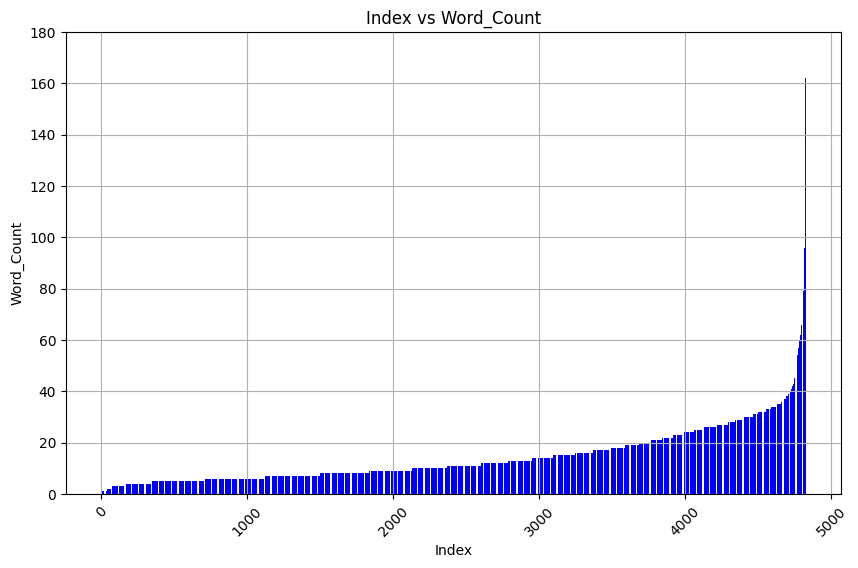

In [ ]:
barplot_ham_word = df_ham.sort_values('Word_Count').reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.bar(barplot_ham_word.index, barplot_ham_word['Word_Count'], color='blue')

plt.xlabel('Index')
plt.ylabel('Word_Count')
plt.title('Index vs Word_Count')
plt.xticks(rotation=45)
plt.yticks(range(0, int(max(barplot_ham_word['Word_Count'])) + 20, 20))
plt.grid(True)
plt.show()

In [ ]:
df_spam['Word_Count'] = df_spam['Text'].apply(count_words)
df_spam.sort_values("Word_Count")

<ipython-input-188-87a16e5479f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam['Word_Count'] = df_spam['Text'].apply(count_words)


,Types,Text,Length,Word_Count
3742,spam,2/2 146tf150p,13.0,2
3981,spam,ringtoneking 84484,18.0,2
2079,spam,85233 FREE>Ringtone!Reply REAL,30.0,3
2804,spam,FreeMsg>FAV XMAS TONES!Reply REAL,33.0,4
5468,spam,http//tms. widelive.com/index. wml?id=820554ad...,85.0,5
...,...,...,...,...
235,spam,Text & meet someone sexy today. U can find a d...,157.0,34
1734,spam,"Hi, this is Mandy Sullivan calling from HOTMIX...",224.0,34
4534,spam,Gr8 new service - live sex video chat on your ...,160.0,34
684,spam,Hi I'm sue. I am 20 years old and work as a la...,158.0,35


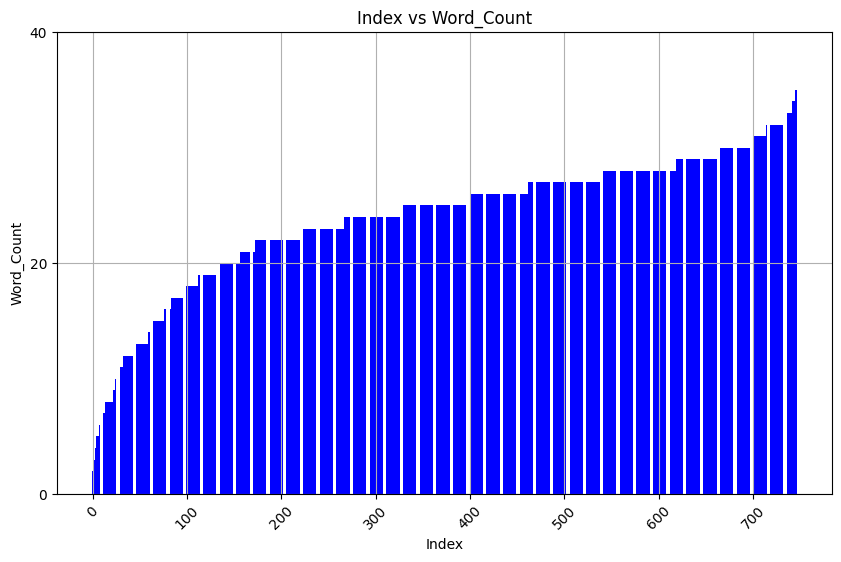

In [ ]:
barplot_spam_word = df_spam.sort_values('Word_Count').reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.bar(barplot_spam_word.index, barplot_spam_word['Word_Count'], color='blue')

plt.xlabel('Index')
plt.ylabel('Word_Count')
plt.title('Index vs Word_Count')
plt.xticks(rotation=45)
plt.yticks(range(0, int(max(barplot_spam_word['Word_Count'])) + 20, 20))
plt.grid(True)
plt.show()

In [ ]:
df_ham[df_ham["Word_Count"]<10].sort_values("Word_Count")

,Types,Text,Length,Word_Count
2508,ham,Yup...,6.0,1
3156,ham,Ok...,5.0,1
4244,ham,Okie...,7.0,1
3901,ham,Okie,4.0,1
1925,ham,Ok,2.0,1
...,...,...,...,...
2883,ham,Hi Harish's rent has been transfred to ur Acnt.,47.0,9
4029,ham,Lol its ok I didn't remember til last nite,42.0,9
4883,ham,As usual u can call me ard 10 smth.,35.0,9
1282,ham,Am I the only one who doesn't stalk profiles?,45.0,9


In [ ]:
df_spam[df_spam["Word_Count"]<10].sort_values("Word_Count")

,Types,Text,Length,Word_Count
3981,spam,ringtoneking 84484,18.0,2
3742,spam,2/2 146tf150p,13.0,2
2079,spam,85233 FREE>Ringtone!Reply REAL,30.0,3
2804,spam,FreeMsg>FAV XMAS TONES!Reply REAL,33.0,4
2699,spam,FROM 88066 LOST Â£12 HELP,25.0,5
5468,spam,http//tms. widelive.com/index. wml?id=820554ad...,85.0,5
713,spam,08714712388 between 10am-7pm Cost 10p,37.0,5
415,spam,100 dating service cal;l 09064012103 box334sk38ch,49.0,6
1777,spam,Call FREEPHONE 0800 542 0578 now!,33.0,6
2269,spam,88066 FROM 88066 LOST 3POUND HELP,33.0,6


ham นั้นมีจำนวนคำในประโยคน้อยกว่า 10 คำ ทั้งหมด 2127 ข้อความ ซึ่งเป็นคำที่บ่งบอกถึงอารมณ์เป็นส่วนมาก หรือคำตอบรับ/ตอบกลับ และเป็นข้อความเชิงภาษาพูด

Spam ส่วนใหญ่เป็นข้อความเชิงแจ้งเตือน และเชิญชวน

-------

5. n-gram analysis on both spam and ham

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

df['Text'] = df['Text'].astype(str)
spam_texts = df[df['Types'] == 'spam']['Text']
ham_texts = df[df['Types'] == 'ham']['Text']

def ngram_analysis(texts, n):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams_matrix = vectorizer.fit_transform(texts)
    ngrams_count = ngrams_matrix.sum(axis=0)
    ngrams_freq = [(word, ngrams_count[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)
    return ngrams_freq

ngram_spam = ngram_analysis(spam_texts, 2)
ngram_ham = ngram_analysis(ham_texts, 2)

print("Top 10 bigrams in spam messages:")
print(ngram_spam[:10])

print("\nTop 10 bigrams in non-spam messages:")
print(ngram_ham[:10])


Top 10 bigrams in spam messages:
[('you have', 73), ('have won', 54), ('your mobile', 50), ('co uk', 49), ('to claim', 47), ('please call', 46), ('this is', 41), ('to contact', 37), ('you are', 36), ('stop to', 29)]

Top 10 bigrams in non-spam messages:
[('lt gt', 276), ('are you', 178), ('do you', 94), ('you are', 94), ('if you', 92), ('in the', 86), ('want to', 83), ('going to', 77), ('have to', 71), ('to be', 66)]


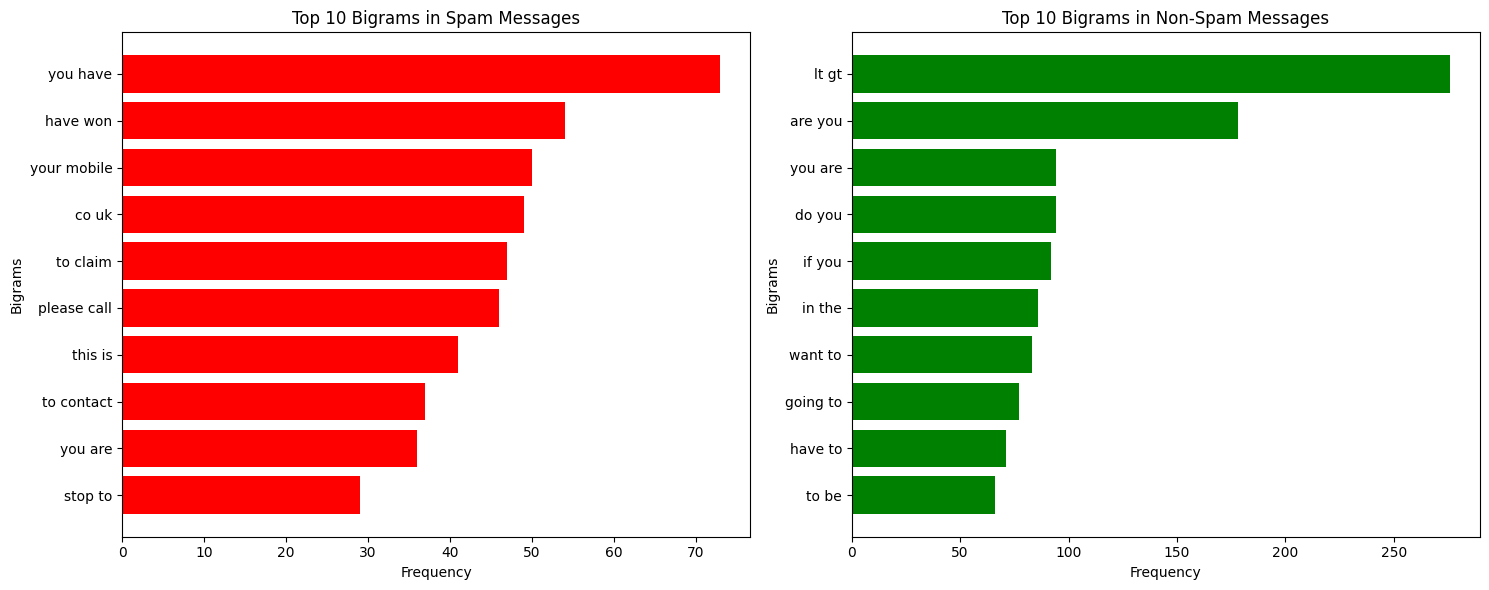

In [12]:
# Extract bigram labels and frequencies
spam_labels, spam_frequencies = zip(*sorted(ngram_spam[:10], key=lambda x: x[1], reverse=False))
non_spam_labels, non_spam_frequencies = zip(*sorted(ngram_ham[:10], key=lambda x: x[1], reverse=False))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart for spam messages
ax1.barh(spam_labels, spam_frequencies, color='red')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Bigrams')
ax1.set_title('Top 10 Bigrams in Spam Messages')

# Bar chart for non-spam messages
ax2.barh(non_spam_labels, non_spam_frequencies, color='green')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Bigrams')
ax2.set_title('Top 10 Bigrams in Non-Spam Messages')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

bigrams ทำให้เห็นว่า คู่ของคำใน spam จะบ่งบอกได้ว่าเป็น spam เช่น มือถือของคุณ , เพื่อรับ , กรุณาโทร , คุณชนะ ซึ่งคล้ายคลึงคำใน spam mail | แต่สำหรับคำของ ham นั้นไม่บ่งบอกถึงการที่จะเป็น spam mail มากนักโดยส่วนมากจะคล้ายกับข้อความสื่อสารจากคนรู้จัก

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

df['Text'] = df['Text'].astype(str)
spam_texts = df[df['Types'] == 'spam']['Text']
ham_texts = df[df['Types'] == 'ham']['Text']

def ngram_analysis(texts, n):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams_matrix = vectorizer.fit_transform(texts)
    ngrams_count = ngrams_matrix.sum(axis=0)
    ngrams_freq = [(word, ngrams_count[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)
    return ngrams_freq

ngram_spam = ngram_analysis(spam_texts, 3)
ngram_ham = ngram_analysis(ham_texts, 3)

print("Top 10 bigrams in spam messages:")
print(ngram_spam[:10])

print("\nTop 10 bigrams in non-spam messages:")
print(ngram_ham[:10])


Top 10 bigrams in spam messages:
[('you have won', 37), ('prize guaranteed call', 21), ('1000 cash or', 19), ('urgent your mobile', 18), ('find out who', 18), ('from land line', 18), ('to contact you', 16), ('valid 12hrs only', 16), ('account statement for', 16), ('this is the', 16)]

Top 10 bigrams in non-spam messages:
[('ll call later', 39), ('sorry ll call', 38), ('how are you', 38), ('let me know', 26), ('where are you', 23), ('lt decimal gt', 23), ('hope you are', 21), ('when you re', 20), ('happy new year', 18), ('what are you', 17)]


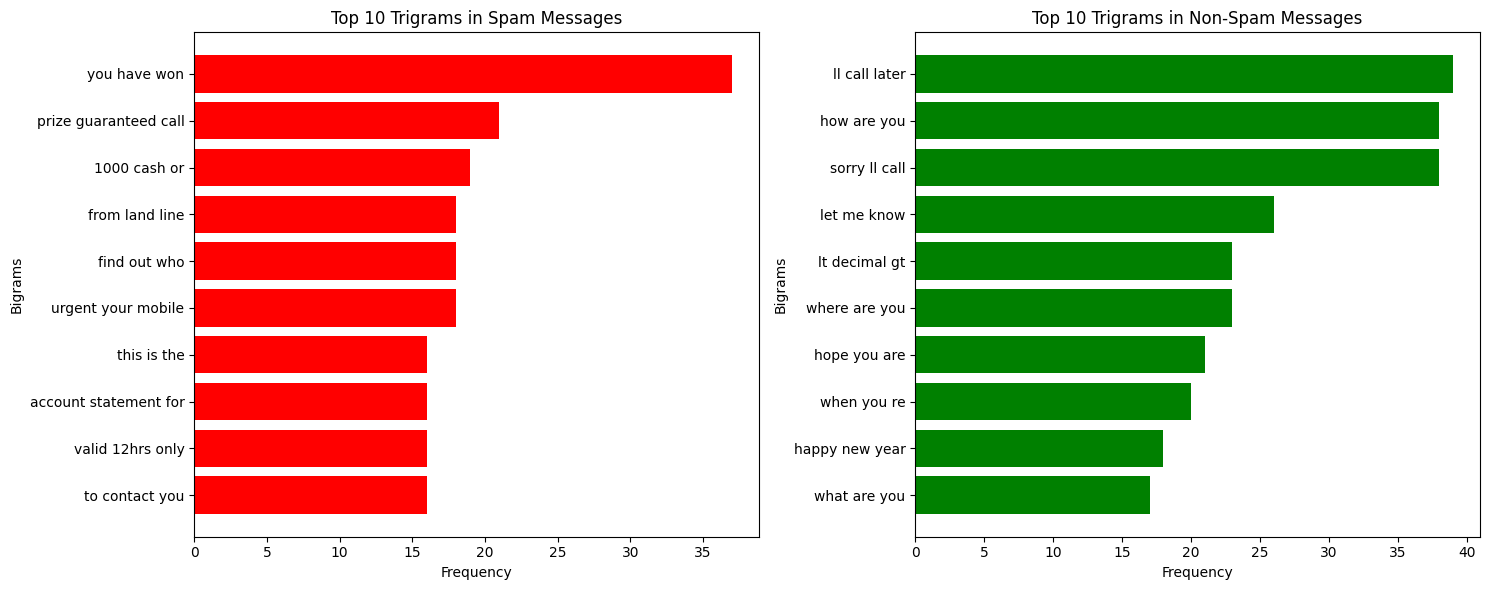

In [15]:
# Extract bigram labels and frequencies
spam_labels, spam_frequencies = zip(*sorted(ngram_spam[:10], key=lambda x: x[1], reverse=False))
non_spam_labels, non_spam_frequencies = zip(*sorted(ngram_ham[:10], key=lambda x: x[1], reverse=False))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart for spam messages
ax1.barh(spam_labels, spam_frequencies, color='red')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Bigrams')
ax1.set_title('Top 10 Trigrams in Spam Messages')

# Bar chart for non-spam messages
ax2.barh(non_spam_labels, non_spam_frequencies, color='green')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Bigrams')
ax2.set_title('Top 10 Trigrams in Non-Spam Messages')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

โดยเฉพาะสำหรับ Tri-gram นั้นบ่งบอกถึงข้อความ spam ได้ชัดยิ่งขึ้น